In [202]:
import pandas as pd

In [203]:
csv = pd.read_csv('../Data/iris.csv')

In [204]:
csv_data = csv.iloc[:,:4]
csv_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [205]:
csv_label = csv.iloc[:,4]
csv_label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
train_data , test_data , train_label, test_label = \
train_test_split(csv_data, csv_label, stratify=csv_label)

In [208]:
# randomforest 모델 가져오기
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf = RandomForestClassifier()

In [210]:
clf.fit(train_data,train_label)

RandomForestClassifier()

In [211]:
clf.score(test_data, test_label)

0.9736842105263158

---
### 독버섯과 관련된 데이터를 사용한 머신러닝

In [212]:
# data 획득하기
import urllib.request as req

local = '../Data/mushroom.csv'
url='https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url,local)

('../Data/mushroom.csv', <http.client.HTTPMessage at 0x16b9be490>)

In [213]:
mr=pd.read_csv('../Data/mushroom.csv',header=None)

In [214]:
mr.shape

(8124, 23)

In [215]:
mr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [216]:
# 데이터 내부의 기호를 숫자로 변환하기
label = []
data = []

for row_index , row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

data[0:20]

[[120,
  115,
  110,
  116,
  112,
  102,
  99,
  110,
  107,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  121,
  116,
  97,
  102,
  99,
  98,
  107,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  103],
 [98,
  115,
  119,
  116,
  108,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  109],
 [120,
  121,
  119,
  116,
  112,
  102,
  99,
  110,
  110,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  103,
  102,
  110,
  102,
  119,
  98,
  107,
  116,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  101,
  110,
  97,
  103],
 [120,
  121,
  121,
  116,
  97,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  110,
  103],
 [98,
  115,
  119,
  116,
  97,
  102,
  99,
  98,
  103,
  101,
  99,
  115,
  115,


In [217]:
# label을 DataFrame으로 만들기
labelTemp = pd.DataFrame(label)
labelTemp.head()

,0
0,p
1,e
2,e
3,p
4,e


In [218]:
dataTemp = pd.DataFrame(data)
dataTemp.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103


In [219]:
dataTemp.rename(columns=lambda x:x+1,inplace=True)

In [220]:
dataTemp.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103


In [221]:
# 2개의 DataFrame 합치기
mr2 = pd.concat([labelTemp,dataTemp],axis=1)
mr2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,120,115,110,116,112,102,99,110,107,...,115,119,119,112,119,111,112,107,115,117
1,e,120,115,121,116,97,102,99,98,107,...,115,119,119,112,119,111,112,110,110,103
2,e,98,115,119,116,108,102,99,98,110,...,115,119,119,112,119,111,112,110,110,109
3,p,120,121,119,116,112,102,99,110,110,...,115,119,119,112,119,111,112,107,115,117
4,e,120,115,103,102,110,102,119,98,107,...,115,119,119,112,119,111,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,107,115,110,102,110,97,99,98,121,...,115,111,111,112,111,111,112,98,99,108
8120,e,120,115,110,102,110,97,99,98,121,...,115,111,111,112,110,111,112,98,118,108
8121,e,102,115,110,102,110,97,99,98,110,...,115,111,111,112,111,111,112,98,99,108
8122,p,107,121,110,102,121,102,99,110,98,...,107,119,119,112,119,111,101,119,118,108


In [222]:
mr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   int64 
 2   2       8124 non-null   int64 
 3   3       8124 non-null   int64 
 4   4       8124 non-null   int64 
 5   5       8124 non-null   int64 
 6   6       8124 non-null   int64 
 7   7       8124 non-null   int64 
 8   8       8124 non-null   int64 
 9   9       8124 non-null   int64 
 10  10      8124 non-null   int64 
 11  11      8124 non-null   int64 
 12  12      8124 non-null   int64 
 13  13      8124 non-null   int64 
 14  14      8124 non-null   int64 
 15  15      8124 non-null   int64 
 16  16      8124 non-null   int64 
 17  17      8124 non-null   int64 
 18  18      8124 non-null   int64 
 19  19      8124 non-null   int64 
 20  20      8124 non-null   int64 
 21  21      8124 non-null   int64 
 22  22      8124 non-null   

In [223]:
# 랜덤포레스트 적용시키기
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train , y_test = \
    train_test_split(mr2.iloc[:,1:2],mr2.iloc[:,0],stratify=mr2.iloc[:,0])

In [225]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [226]:
print()

In [227]:
train_accur = []
test_accur = []

for i in range(2,23):
    X_train, X_test, y_train , y_test = \
    train_test_split(mr2.iloc[:,1:i],mr2.iloc[:,0],stratify=mr2.iloc[:,0])
    clf.fit(X_train,y_train)
    train_accur.append(clf.score(X_train,y_train))
    test_accur.append(clf.score(X_test,y_test))

In [228]:
import matplotlib.pyplot as plt
import numpy as np

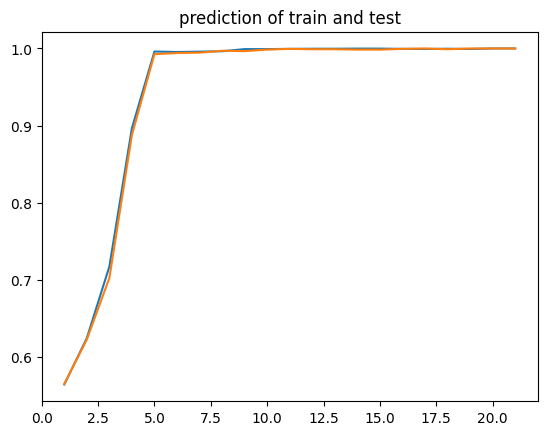

In [229]:
plt.plot(
    np.arange(1,22),
    train_accur
)

plt.plot(
    np.arange(1,22),
    test_accur
)

plt.title('prediction of train and test')

plt.show()

### 숫자가 의미가 없기 때문에 one-hot encoding 해줘야한다. 

In [239]:
# 하나 one hot encoding 해보기
pd.get_dummies(data=dataTemp,columns=[1],prefix='1')

,2,3,4,5,6,7,8,9,10,11,...,19,20,21,22,1_98,1_99,1_102,1_107,1_115,1_120
0,115,110,116,112,102,99,110,107,101,101,...,112,107,115,117,0,0,0,0,0,1
1,115,121,116,97,102,99,98,107,101,99,...,112,110,110,103,0,0,0,0,0,1
2,115,119,116,108,102,99,98,110,101,99,...,112,110,110,109,1,0,0,0,0,0
3,121,119,116,112,102,99,110,110,101,101,...,112,107,115,117,0,0,0,0,0,1
4,115,103,102,110,102,119,98,107,116,101,...,101,110,97,103,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,115,110,102,110,97,99,98,121,101,63,...,112,98,99,108,0,0,0,1,0,0
8120,115,110,102,110,97,99,98,121,101,63,...,112,98,118,108,0,0,0,0,0,1
8121,115,110,102,110,97,99,98,110,101,63,...,112,98,99,108,0,0,1,0,0,0
8122,121,110,102,121,102,99,110,98,116,63,...,101,119,118,108,0,0,0,1,0,0


In [ ]:
# 적용시키기
dataTemp=pd.get_dummies(data=dataTemp,columns=mr2.columns[1:])

In [ ]:
mr3 = pd.concat([labelTemp,dataTemp],axis=1)
mr3.head()

In [ ]:
X_train, X_test, y_train , y_test = \
train_test_split(mr3.iloc[:,1:],mr3.iloc[:,0],stratify=mr3.iloc[:,0])
clf.fit(X_train,y_train)
clf.score(X_test,y_test)